## Project 1, Part 3: Data Analysis and Visualization
 

**Name: Denilson Wilson Aguilar Molina**

**Date: 03/05/2024**

The first part of the code imports pandas as pd and matplotlib as plt

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

This part reads the datasets into a pandas dataframe.

In [2]:
# assigns/loads the cleaned datasets
df = pd.read_csv('comp2023-cleaned.csv')
df2 = pd.read_csv('comp2022-cleaned.csv')
df3 = pd.read_csv('comp2021-cleaned.csv')
df4 = pd.read_csv('comp2020-cleaned.csv')

#This one is to concatenate the datasets
df_all = pd.concat([df, df2, df3, df4])

1. For each course in the latest survey,  what are the relative number of enrollments in the various degree programs? 

This first one focuses on results from the 2023 file

cleaned_degree                                      Business  \
course_enrolled                                                
Computing 120 Foundations of Information Security          0   
Computing 128 Computer Science I                           3   
Computing 130 Intro to IT                                  0   
Computing 131 Fundamentals of Programming (Python)         0   
Computing 239 Internet & Web Design                        0   

cleaned_degree                                      Computer Science  \
course_enrolled                                                        
Computing 120 Foundations of Information Security                  5   
Computing 128 Computer Science I                                  51   
Computing 130 Intro to IT                                          3   
Computing 131 Fundamentals of Programming (Python)                11   
Computing 239 Internet & Web Design                                2   

cleaned_degree                                

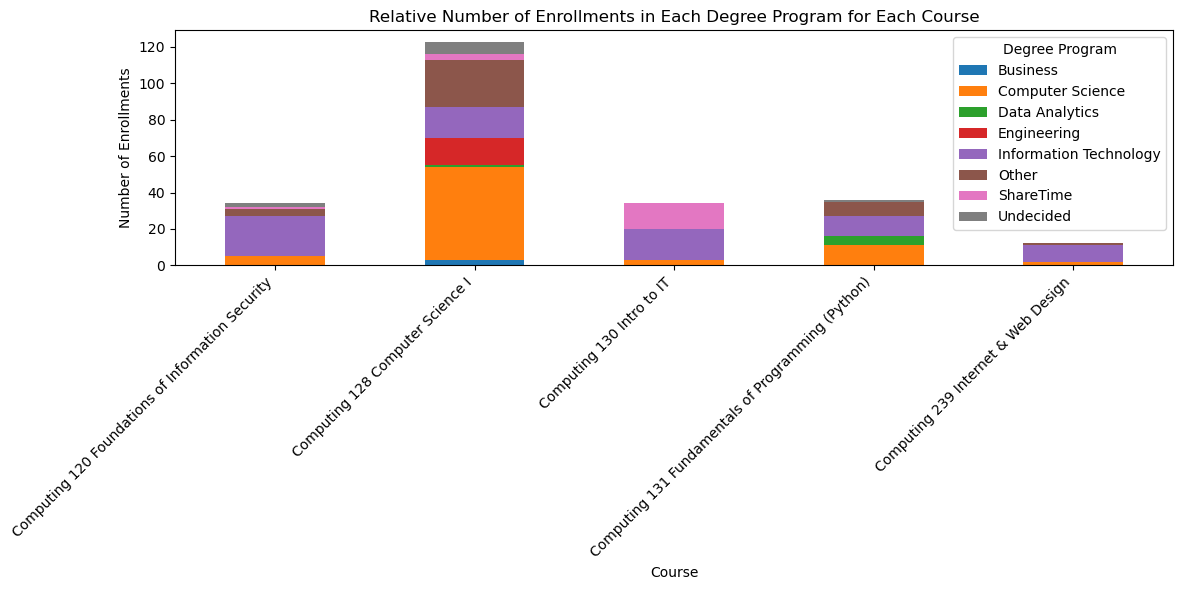

In [3]:
# This function cleans and condenses the degree program field
def clean_degree(degree):
    if 'engineering' in degree.lower():
        return 'Engineering'
    elif "computer science" in degree.lower() or "computing" in degree.lower():
        return "Computer Science"
    elif "information technology" in degree.lower() or "it" in degree.lower():
        return "Information Technology"
    elif 'undecided' in degree.lower():
        return 'Undecided'
    elif 'business' in degree.lower():
        return 'Business'
    elif 'data analytics' in degree.lower():
        return 'Data Analytics'
    elif 'sharetime' in degree.lower():
        return 'ShareTime'
    else:
        return 'Other'

# This applies the information into the condense degree program, from the given file
df["cleaned_degree"] = df["degree_program_currently_enrolled_in"].apply(clean_degree)

# This calculates the relative number of enrollments for each course and degree program.
course_degrees = df.groupby(["course_enrolled", "cleaned_degree"]).size().unstack(fill_value=0)
course_degrees["total_enrollments"] = course_degrees.sum(axis=1)
course_degrees["relative_enrollments"] = course_degrees["total_enrollments"] / course_degrees["total_enrollments"].sum()

# This prints and displays the relative number of enrollments in each degree program for each course
print(course_degrees)#this changes was made to make it easier to view and understaand the data

# This plots the distribution of enrollments
course_degrees.drop(columns=["total_enrollments", "relative_enrollments"]).plot(kind="bar", stacked=True, figsize=(12, 6))
plt.title("Relative Number of Enrollments in Each Degree Program for Each Course")
plt.ylabel("Number of Enrollments")
plt.xlabel("Course")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Degree Program", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()
#the extra week made it easier to do some fixes

It can be seen that in 2023, the relative number of enrollments in the various course with the most enrollments was Computer Science I, with the majority of the students being in the Computer Science degree program.

2. Compare the race/ethnicity demographics of the survey over time (2020-2023). What are the changes over time, if any?

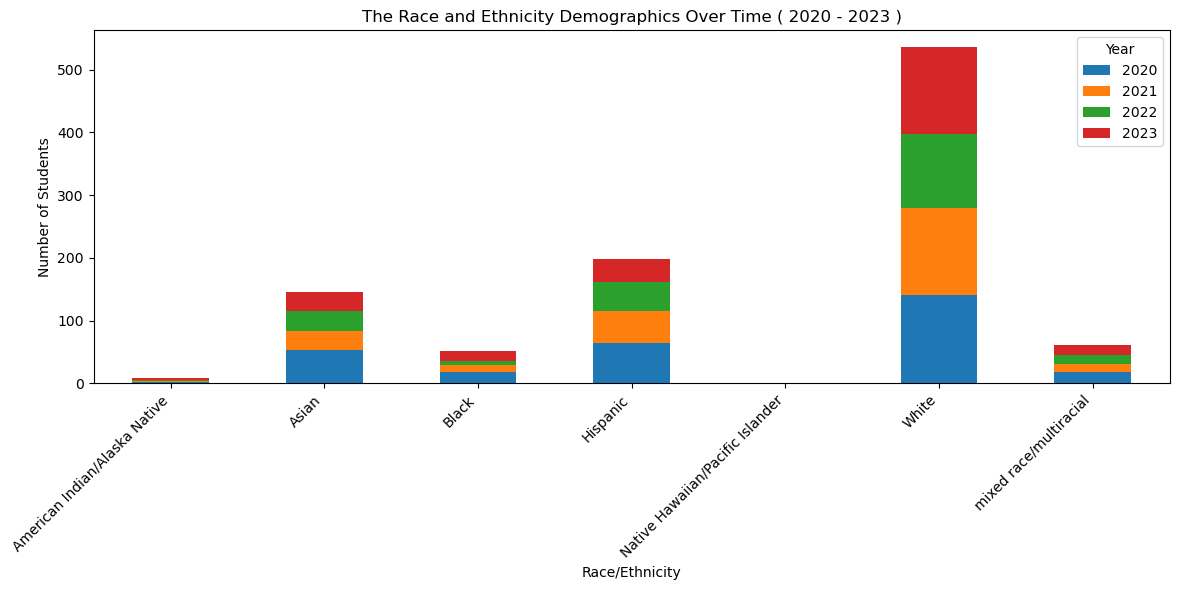

In [65]:
# The purpose of this function is to clean and condense the race/ethnicity field, since it has a lot of different responses
def clean_race_ethnicity(race_ethnicity):
    if "white" in race_ethnicity.lower():
        return "White"
    elif "black" in race_ethnicity.lower() or "african american" in race_ethnicity.lower():
        return "Black"
    elif "hispanic" in race_ethnicity.lower() or "latino" in race_ethnicity.lower():
        return "Hispanic"
    elif "asian" in race_ethnicity.lower():
        return "Asian"
    elif "native hawaiian" in race_ethnicity.lower() or "pacific islander" in race_ethnicity.lower():
        return "Native Hawaiian/Pacific Islander"
    elif "american indian" in race_ethnicity.lower() or "alaska native" in race_ethnicity.lower():
        return "American Indian/Alaska Native"
    else:
        return "mixed race/multiracial"
#in order to determine all of the races i had to view the datasets, some of them had multiple combined responses
#it was easier to condense them into the multiracial/mixed race.   
    
# This uses the "clean_race_ethnicity" function to clean the race/ethnicity field
df_all["cleaned_race_ethnicity"] = df_all["race_ethnicity"].apply(clean_race_ethnicity)#one of the one where i had to spend a lot of time recreating/reworking

# This plots out race ethnicity distribution over the years in a bar form
race_ethnicity_over_time = df_all.groupby(["cleaned_race_ethnicity", df_all["timestamp"].str.slice(0, 4)])["cleaned_race_ethnicity"].count().unstack(fill_value=0)
race_ethnicity_over_time.plot(kind="bar", stacked=True, figsize=(12, 6))
plt.title("The Race and Ethnicity Demographics Over Time ( 2020 - 2023 )")
plt.ylabel("Number of Students")
plt.xlabel("Race/Ethnicity")
plt.legend(title="Year", bbox_to_anchor=(1, 1))
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Throughout the years it can be seen that the majority of the white/caucasin people who've a course in tech, they seemingly have been the majority. then following hispanics/latinos, asians, etc. It has vary slightly through out the years but the distributuion has remained the same throughout for the race/ethnicity demographic. It can be said that race distrubution for any other race besides white as decreased over time.

3. What is the most common way students hear about CCM?

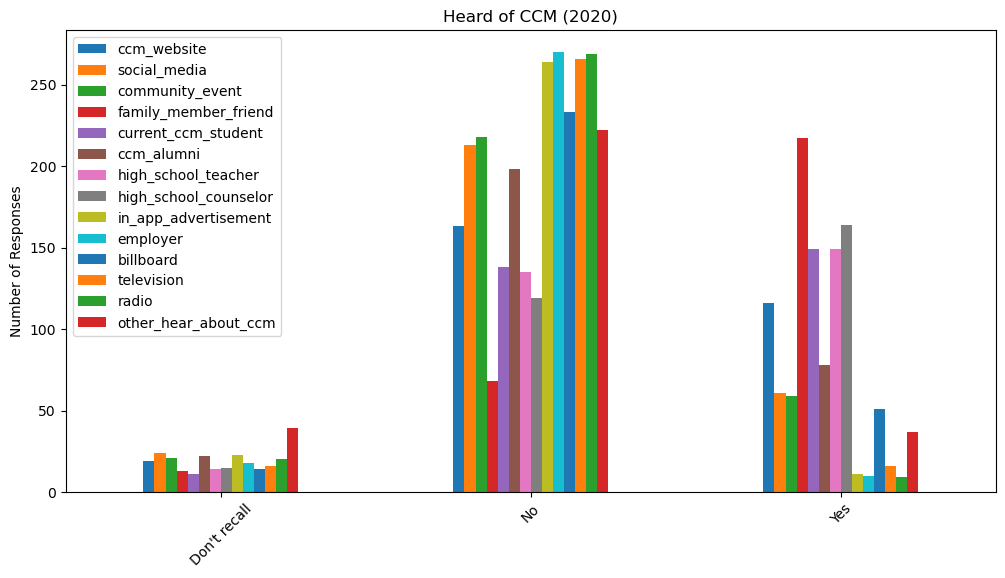

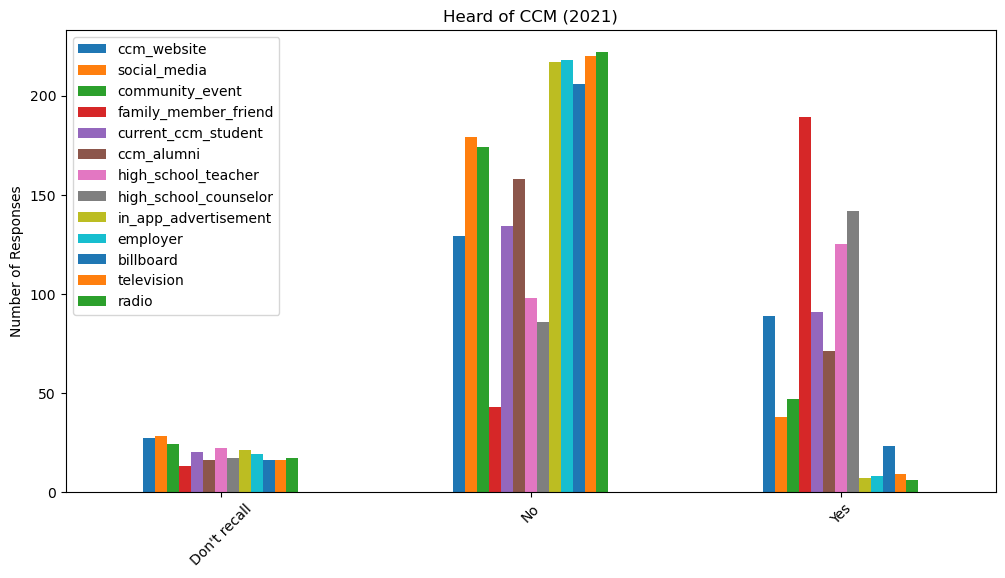

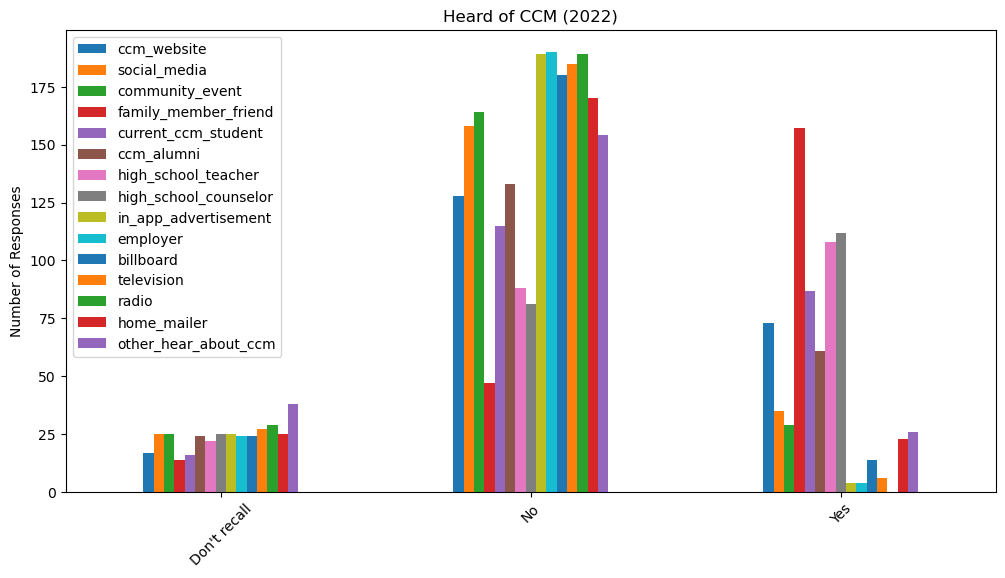

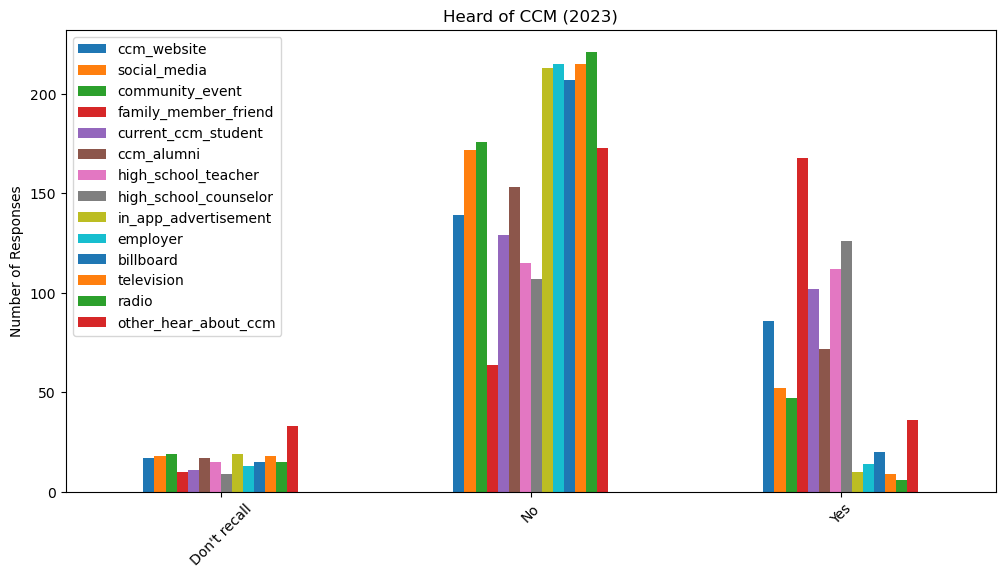

In [132]:
# This filter the columns for 2020 in order to see what is the most common a student heard about ccm
factors_2020 = df4[['ccm_website', 'social_media', 'community_event','family_member_friend', 'current_ccm_student', 'ccm_alumni','high_school_teacher', 'high_school_counselor', 'in_app_advertisement','employer', 'billboard', 'television', 'radio','other_hear_about_ccm']]

# This calculates the total amount for 2020
factors_2020_count = factors_2020.apply(pd.Series.value_counts).fillna(0)

# This is just a bar graph to plot it all out
factors_2020_count.plot(kind='bar', figsize=(12, 6))
plt.ylabel('Number of Responses')
plt.title('Heard of CCM (2020)')
plt.xticks(rotation=45)
plt.show()

# This filter the columns for 2021 in order to see what is the most common a student heard about ccm
factors_2021 = df3[['ccm_website', 'social_media', 'community_event','family_member_friend', 'current_ccm_student', 'ccm_alumni','high_school_teacher', 'high_school_counselor', 'in_app_advertisement','employer', 'billboard', 'television', 'radio']]

# This calculates the total amount for 2021
factors_2021_count = factors_2021.apply(pd.Series.value_counts).fillna(0)

# This is just a bar graph to plot it all out
factors_2021_count.plot(kind='bar', figsize=(12, 6))
plt.ylabel('Number of Responses')
plt.title('Heard of CCM (2021)')
plt.xticks(rotation=45)
plt.show()

# This filter the columns for 2022 in order to see what is the most common a student heard about ccm
factors_2022 = df2[['ccm_website', 'social_media', 'community_event','family_member_friend', 'current_ccm_student', 'ccm_alumni', 'high_school_teacher', 'high_school_counselor', 'in_app_advertisement', 'employer', 'billboard', 'television', 'radio', 'home_mailer', 'other_hear_about_ccm']]

# This calculates the total amount for 2021
factors_2022_count = factors_2022.apply(pd.Series.value_counts).fillna(0)

# This is just a bar graph to plot it all out
factors_2022_count.plot(kind='bar', figsize=(12, 6))
plt.ylabel('Number of Responses')
plt.title('Heard of CCM (2022)')
plt.xticks(rotation=45)
plt.show()

# This filter the columns for 2022 in order to see what is the most common a student heard about ccm
factors_2023 = df[['ccm_website', 'social_media', 'community_event','family_member_friend', 'current_ccm_student', 'ccm_alumni','high_school_teacher', 'high_school_counselor', 'in_app_advertisement','employer', 'billboard', 'television', 'radio', 'other_hear_about_ccm']]

# This calculates the total amount for 2021
factors_2023_count = factors_2023.apply(pd.Series.value_counts).fillna(0)

# This is just a bar graph to plot it all out
factors_2023_count.plot(kind='bar', figsize=(12, 6))
plt.ylabel('Number of Responses')
plt.title('Heard of CCM (2023)')
plt.xticks(rotation=45)
plt.show()



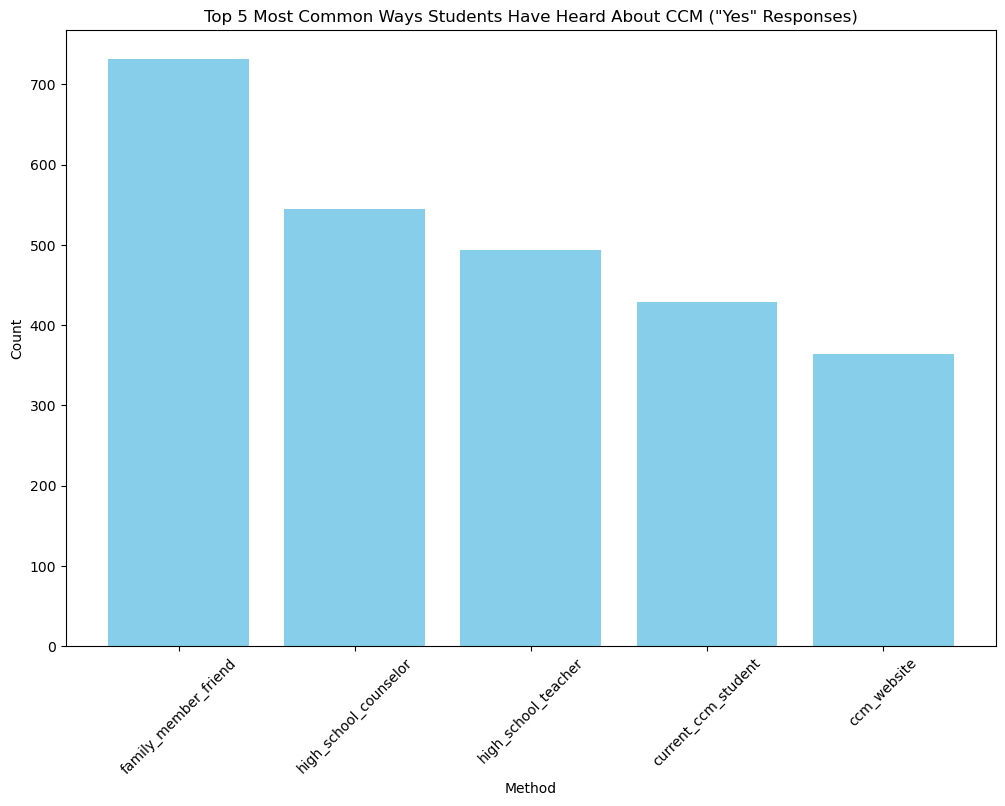

Total Count of 'Yes' Responses for family_member_friend: 731
Total Count of 'Yes' Responses for high_school_counselor: 544
Total Count of 'Yes' Responses for high_school_teacher: 494
Total Count of 'Yes' Responses for current_ccm_student: 429
Total Count of 'Yes' Responses for ccm_website: 364


In [139]:
# This  grabs the relvent columns for combining the responses And for the yes answers.
yes_columns = ['ccm_website', 'social_media', 'community_event', 'family_member_friend', 'current_ccm_student','ccm_alumni', 'high_school_teacher', 'high_school_counselor', 'in_app_advertisement', 'employer','billboard', 'television', 'radio', 'home_mailer', 'other_hear_about_ccm']

# This calculate the total count of "yes" responses for each of the methods
yes_counts = {} #this was a pain to make but it made it eaiser to organize the reponses for each category
for column in yes_columns:
    counts = df_all[column].value_counts()
    yes_counts[column] = counts.get('Yes', 0)

# This sort the count to find the top 5 best methods
sorted_counts = sorted(yes_counts.items(), key=lambda x: x[1], reverse=True)
top5_methods = sorted_counts[:5]

# This calculates the total count of "yes" reponses for all methods
total_yes_count = sum(yes_counts.values())

# # This makes a datagrame using the collect count
df_top5 = pd.DataFrame(top5_methods, columns=['Method', 'Count'])

# This plots the top 5 methods
plt.figure(figsize=(12, 8))
plt.bar(df_top5['Method'], df_top5['Count'], color='skyblue')
plt.title('Top 5 Most Common Ways Students Have Heard About CCM ("Yes" Responses)')
plt.xlabel('Method')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# this was created since it was difficult for me to find another method to combine them, overall this does get the job done
# this took me the longest to create from all 4

# This calculates and displays the total count of "yes" responses for each of the top 5 methods
for method, count in top5_methods:
    total_count = df_all[method].value_counts().get('Yes', 0)
    print(f"Total Count of 'Yes' Responses for {method}: {total_count}")

It can be seen that throughout the years that the most common method students heard of ccm is from friends and family, followed by high school counselor, high school teacher, current ccm student, and ccm's website itself. They are the top 5 best methods used to attract students to CCM as they are the highest.

4. Which prior events or activities at the County College of Morris and/or with the Department of Information Technologies most significantly influence a student's choice for applying for a computing course/major?

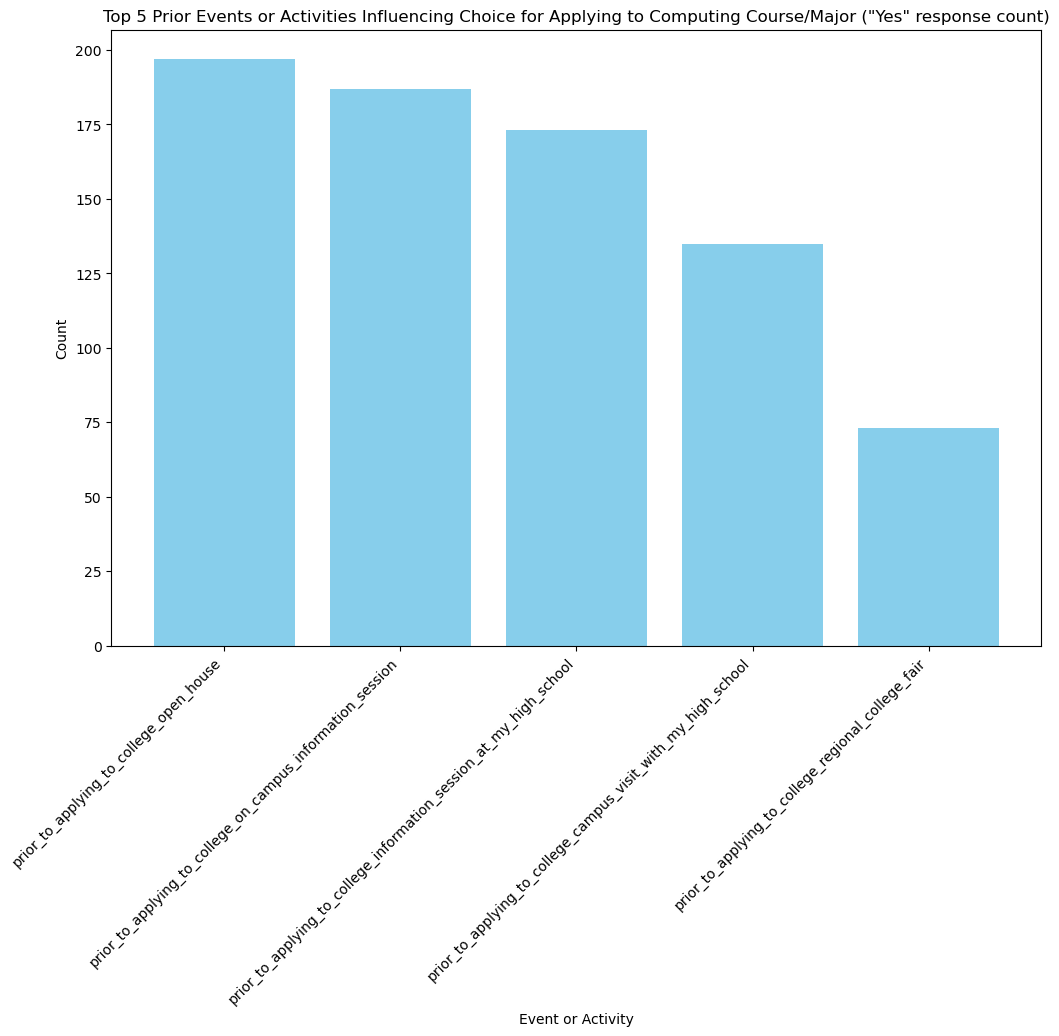

Top 5 Prior Events or Activities ('Yes'response count):
                                                    Count
prior_to_applying_to_college_open_house               197
prior_to_applying_to_college_on_campus_informat...    187
prior_to_applying_to_college_information_sessio...    173
prior_to_applying_to_college_campus_visit_with_...    135
prior_to_applying_to_college_regional_college_fair     73


In [136]:
# This grabs the relevant columns related to prior events or activities for students
event_columns = ['prior_to_applying_to_college_open_house','prior_to_applying_to_college_on_campus_information_session','prior_to_applying_to_college_regional_college_fair','prior_to_applying_to_college_campus_visit_with_my_high_school','prior_to_applying_to_college_information_session_at_my_high_school','prior_to_applying_to_college_workforce_development_class','prior_to_applying_to_college_corporate_training','prior_to_applying_to_college_summer_camp_at_ccm','prior_to_applying_to_college_hour_of_code']

# This calculates the total counts of "yes" responses for each event or activity
event_counts = {}
for column in event_columns:
    counts = df_all[column].value_counts()
    if 'Yes' in counts:
        event_counts[column] = counts['Yes']
    else:
        event_counts[column] = 0

# This creates a dataframe from the counts
df_counts = pd.DataFrame(event_counts, index=['Count']).T

# This select the top 5 events and/or activities
top5_events = df_counts.nlargest(5, 'Count')

# This plots the top 5 events and/or activities
plt.figure(figsize=(12, 8))
plt.bar(top5_events.index, top5_events['Count'], color='skyblue')
plt.title('Top 5 Prior Events or Activities Influencing Choice for Applying to Computing Course/Major ("Yes" response count)')
plt.xlabel('Event or Activity')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

# This prints/displays the results
print("Top 5 Prior Events or Activities ('Yes'response count):")
print(top5_events)#This one didn't take as long because of the previous ones.

It appears prior to going to CCM student's are most influenced by the ccm open house, the campus information sessions, and the college information sessions at their high schools, visiting the campus with their high school, and the college regional college fair. Theses are the top 5 most influencal forces which impacts a student's for choice  for applying to a computing course/major.